Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

Loading the Dataset



In [4]:
df = pd.read_csv('/content/ifood_df.csv')

In [5]:
print("DataFrame loaded successfully. Displaying the first 5 rows:")
df.head()

DataFrame loaded successfully. Displaying the first 5 rows:


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Describing the dataset

In [7]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
df.shape

(2205, 39)

In [9]:
df.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Income,1.000000,-0.531699,0.042483,0.006716,0.730495,0.537920,0.702500,0.551758,0.555601,0.417653,...,-0.001960,0.044336,-0.060621,-0.239604,0.017644,0.021633,0.091176,0.823066,0.816879,0.388247
Kidhome,-0.531699,1.000000,-0.040207,0.011829,-0.499288,-0.374388,-0.445665,-0.389895,-0.379101,-0.356550,...,0.007422,-0.072244,0.019050,0.055308,-0.001930,0.011482,-0.042031,-0.551152,-0.539828,-0.212080
Teenhome,0.042483,-0.040207,1.000000,0.013881,0.002783,-0.176925,-0.267177,-0.206371,-0.164246,-0.019619,...,0.027181,0.047962,-0.056259,-0.120519,-0.024698,0.023806,0.092901,-0.142995,-0.146866,-0.130255
Recency,0.006716,0.011829,0.013881,1.000000,0.016470,-0.004909,0.026138,0.001177,0.025535,0.018558,...,0.023908,-0.001348,-0.006789,-0.003093,0.031419,-0.025563,-0.009234,0.021132,0.020241,-0.013344
MntWines,0.730495,-0.499288,0.002783,0.016470,1.000000,0.384947,0.593119,0.395967,0.388613,0.390194,...,0.005915,0.034139,-0.096259,-0.140369,-0.060920,0.036403,0.160804,0.902310,0.901848,0.509913
MntFruits,0.537920,-0.374388,-0.176925,-0.004909,0.384947,1.000000,0.568100,0.592556,0.570986,0.392596,...,-0.014210,0.025961,0.025452,-0.060915,0.114919,-0.055581,-0.084301,0.606658,0.594180,0.155133
MntMeatProducts,0.702500,-0.445665,-0.267177,0.026138,0.593119,0.568100,1.000000,0.595673,0.556511,0.375581,...,-0.004064,0.017370,-0.041738,-0.111968,0.064917,-0.004020,-0.004194,0.861392,0.860663,0.319553
MntFishProducts,0.551758,-0.389895,-0.206371,0.001177,0.395967,0.592556,0.595673,1.000000,0.582974,0.425420,...,0.015502,0.041886,0.061304,-0.059840,0.106227,-0.050153,-0.103952,0.635038,0.620626,0.174675
MntSweetProducts,0.555601,-0.379101,-0.164246,0.025535,0.388613,0.570986,0.556511,0.582974,1.000000,0.355747,...,-0.011220,0.049347,0.060550,-0.057863,0.104075,-0.067723,-0.085702,0.604514,0.595394,0.200174
MntGoldProds,0.417653,-0.356550,-0.019619,0.018558,0.390194,0.392596,0.375581,0.425420,0.355747,1.000000,...,-0.010375,0.043096,0.019189,-0.065014,0.131759,-0.032492,-0.119708,0.463694,0.388776,0.194647


In [10]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

Checking the missing values

In [11]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [12]:
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [13]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [14]:
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


Removing the Outliers

In [18]:
data = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


Descriptive Statistics

In [20]:
avg_income = df['Income'].mean()
avg_total_spent = df['MntTotal'].mean()
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
avg_total_purchases = df['TotalPurchases'].mean()
avg_recency = df['Recency'].mean()
avg_web_visits = df['NumWebVisitsMonth'].mean()
avg_campaigns_accepted = df['AcceptedCmpOverall'].mean()

print(f"Average Income: {avg_income:.2f}")
print(f"Average Total Amount Spent: {avg_total_spent:.2f}")
print(f"Average Total Purchases: {avg_total_purchases:.2f}")
print(f"Average Recency (days since last purchase): {avg_recency:.2f}")
print(f"Average Web Visits per Month: {avg_web_visits:.2f}")
print(f"Average Campaigns Accepted: {avg_campaigns_accepted:.2f}")

Average Income: 51622.09
Average Total Amount Spent: 562.76
Average Total Purchases: 14.89
Average Recency (days since last purchase): 49.01
Average Web Visits per Month: 5.34
Average Campaigns Accepted: 0.30


Customer Segmentation

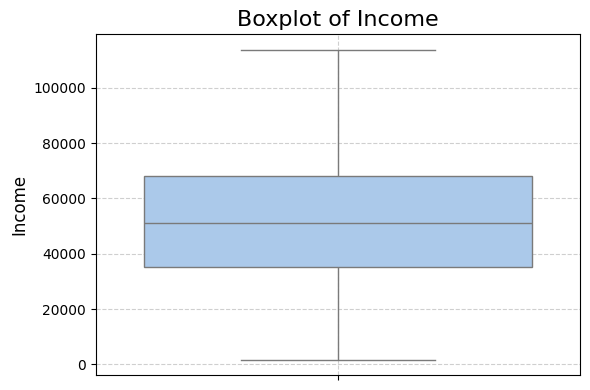

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='Income', palette='pastel')
plt.title('Boxplot of Income', fontsize=16)
plt.ylabel('Income', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

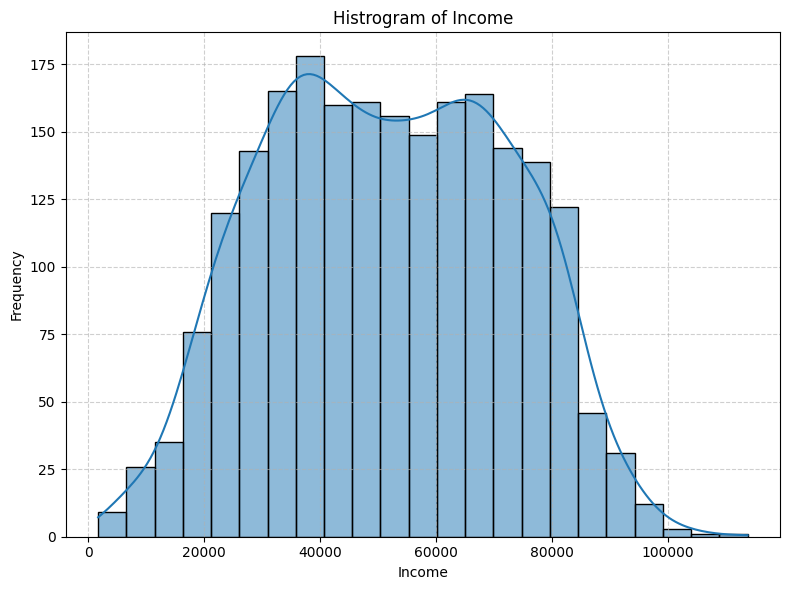

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Income', kde=True, palette='virdis')
plt.title('Histrogram of Income', fontsize=12)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

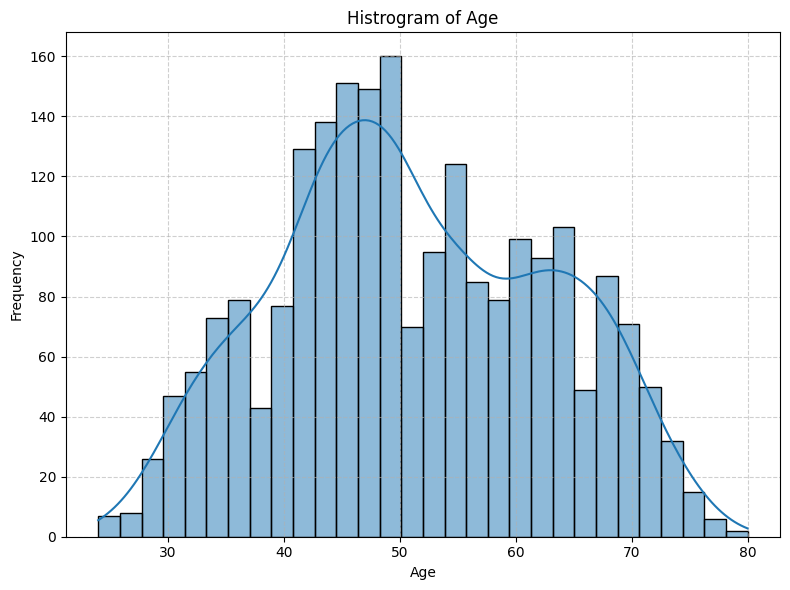

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histrogram of Age', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
print("Skewness: %f" % data['Age'].skew())
print("kurtosis: %f" % data['Age'].kurt())

Skewness: 0.091227
kurtosis: -0.796125


Correlation Matrix

In [24]:
cols_demographics = ['Income', 'Age']
cols_children = ['kidhome', 'Teenhome']
cols_marital = ['Marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntProds', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_comunication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases', 'NumcatalogPurchasese', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

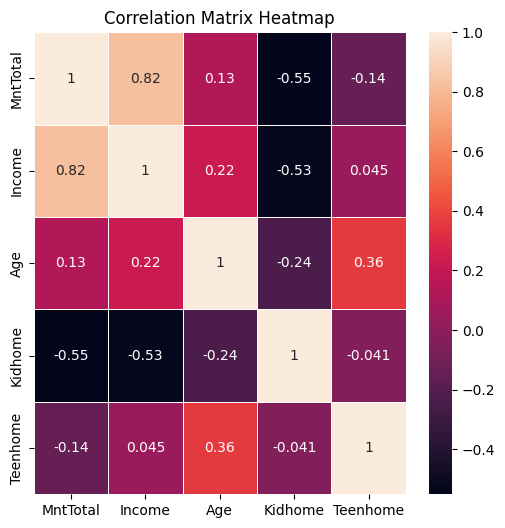

In [25]:
cols_children = ['Kidhome', 'Teenhome']
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Point-Biserial Correlations for binary variable

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Create the 'In_relationship' column from marital status
data['In_relationship'] = (data['marital_Married'] == 1) | (data['marital_Together'] == 1)

cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


In [33]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(data_scaled[cols_for_clustering])

pca_result = pca.transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_result[:,0]
data_scaled['pc2'] = pca_result[:,1]

In [32]:
from sklearn.cluster import KMeans
x = data_scaled[cols_for_clustering]
inertia = []
for k in range(2,10):
  inertia_value = KMeans(n_clusters=k, random_state=7).fit(x).inertia_
  inertia.append(inertia_value)

Feature Engineering for Segmentation

In [35]:
segmentation_df = df[['Recency', 'TotalPurchases', 'MntTotal', 'Income', 'Age', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth']]

print("First 5 rows of segmentation_df:")
print(segmentation_df.head())

print("\nInfo of segmentation_df:")
segmentation_df.info()

First 5 rows of segmentation_df:
   Recency  TotalPurchases  MntTotal   Income  Age  Kidhome  Teenhome  \
0       58              25      1529  58138.0   63        0         0   
1       38               6        21  46344.0   66        1         1   
2       26              21       734  71613.0   55        0         0   
3       26               8        48  26646.0   36        1         0   
4       94              19       407  58293.0   39        1         0   

   NumWebVisitsMonth  
0                  7  
1                  5  
2                  4  
3                  6  
4                  5  

Info of segmentation_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recency            2205 non-null   int64  
 1   TotalPurchases     2205 non-null   int64  
 2   MntTotal           2205 non-null   int64  
 3   Income       

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
segmentation_scaled = scaler.fit_transform(segmentation_df)

# Convert the scaled array back to a DataFrame for easier inspection
segmentation_scaled_df = pd.DataFrame(segmentation_scaled, columns=segmentation_df.columns)

print("First 5 rows of scaled segmentation_df:")
print(segmentation_scaled_df.head())
print("\nDescriptive statistics of scaled segmentation_df:")
print(segmentation_scaled_df.describe())

First 5 rows of scaled segmentation_df:
    Recency  TotalPurchases  MntTotal    Income       Age   Kidhome  Teenhome  \
0  0.310830        1.328161  1.678056  0.314651  1.017189 -0.823405 -0.930767   
1 -0.380600       -1.167390 -0.940880 -0.254877  1.273530  1.038757  0.906602   
2 -0.795458        0.802782  0.297384  0.965354  0.333612 -0.823405 -0.930767   
3 -0.795458       -0.904700 -0.893989 -1.206087 -1.289883  1.038757 -0.930767   
4  1.555404        0.540092 -0.270516  0.322136 -1.033542  1.038757 -0.930767   

   NumWebVisitsMonth  
0           0.689203  
1          -0.139645  
2          -0.554069  
3           0.274779  
4          -0.139645  

Descriptive statistics of scaled segmentation_df:
            Recency  TotalPurchases      MntTotal        Income           Age  \
count  2.205000e+03    2.205000e+03  2.205000e+03  2.205000e+03  2.205000e+03   
mean   7.975480e-17    2.255691e-17 -3.705778e-17  2.255691e-17  1.643432e-16   
std    1.000227e+00    1.000227e+00  1.00

Customer Segmentation (Clustering)

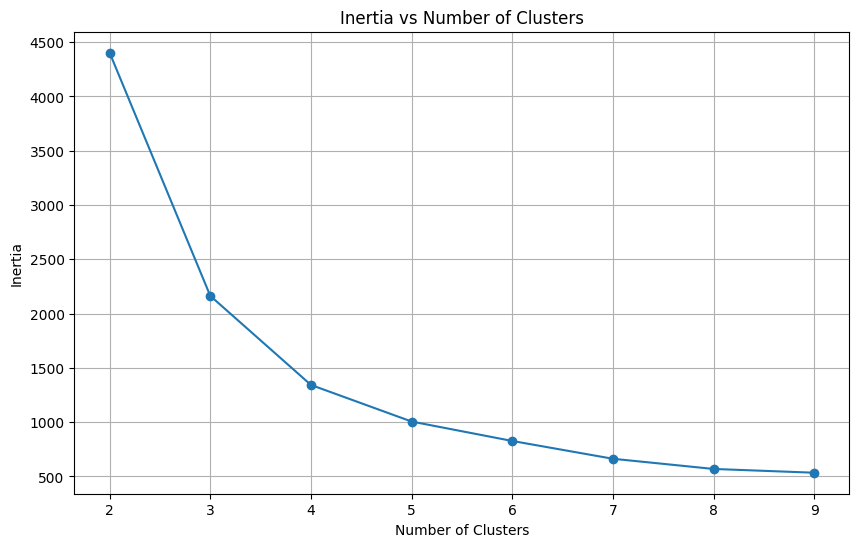

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [37]:
n_clusters_optimal = 4  # Choose 4 based on the elbow plot
kmeans_optimal = KMeans(n_clusters=n_clusters_optimal, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans_optimal.fit_predict(segmentation_scaled_df)

print(f"KMeans clustering applied with {n_clusters_optimal} clusters.")
print("First 5 rows of df with new 'Cluster' column:")
print(df.head())

KMeans clustering applied with 4 clusters.
First 5 rows of df with new 'Cluster' column:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  education_2n Cycle  \
0              172                88            88  ...                   0   
1                2                 1             6  ...                   0   
2              111                21            42  ...                   0   
3               10                 3             5  ...                   0   
4               46                2

## Visualize Customer Segments


Cluster Profiles (Mean values for each feature per cluster):
           Recency  TotalPurchases     MntTotal        Income        Age  \
Cluster                                                                    
0        49.387226       20.243513  1313.832335  76231.796407  51.029940   
1        48.429553        8.369416   101.475945  30058.768041  41.558419   
2        47.978114       21.774411   782.557239  61351.058923  55.947811   
3        50.448864        9.244318   111.303030  41094.426136  56.212121   

          Kidhome  Teenhome  NumWebVisitsMonth  
Cluster                                         
0        0.055888  0.011976           2.626747  
1        0.852234  0.003436           6.972509  
2        0.111111  1.008418           5.358586  
3        0.729167  0.965909           6.081439  


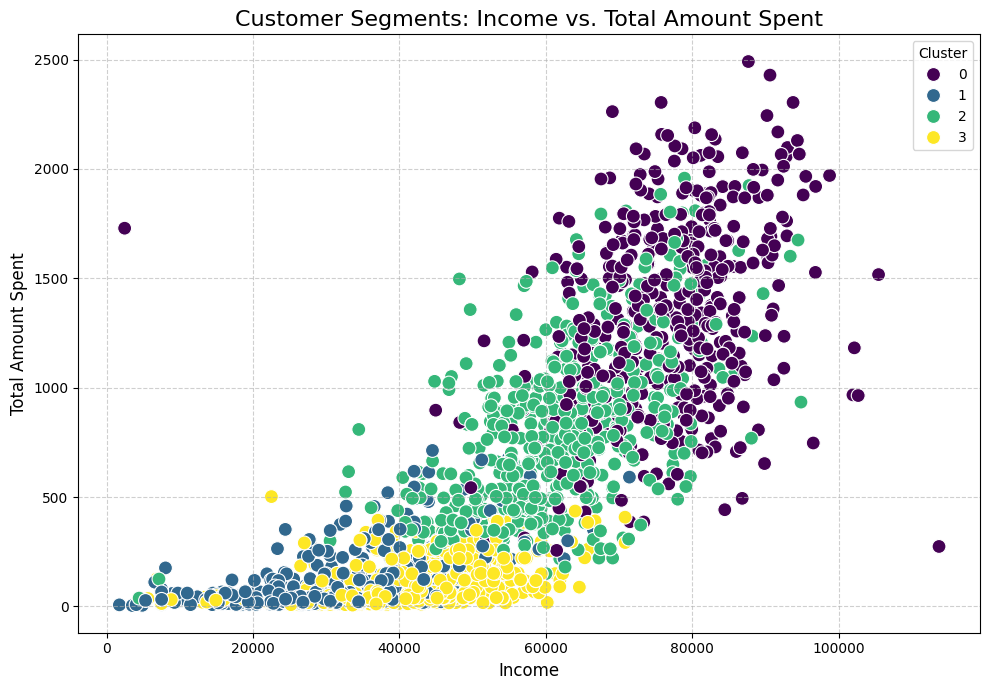

In [38]:
cluster_profiles = df.groupby('Cluster')[['Recency', 'TotalPurchases', 'MntTotal', 'Income', 'Age', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth']].mean()
print("Cluster Profiles (Mean values for each feature per cluster):")
print(cluster_profiles)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Income', y='MntTotal', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments: Income vs. Total Amount Spent', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

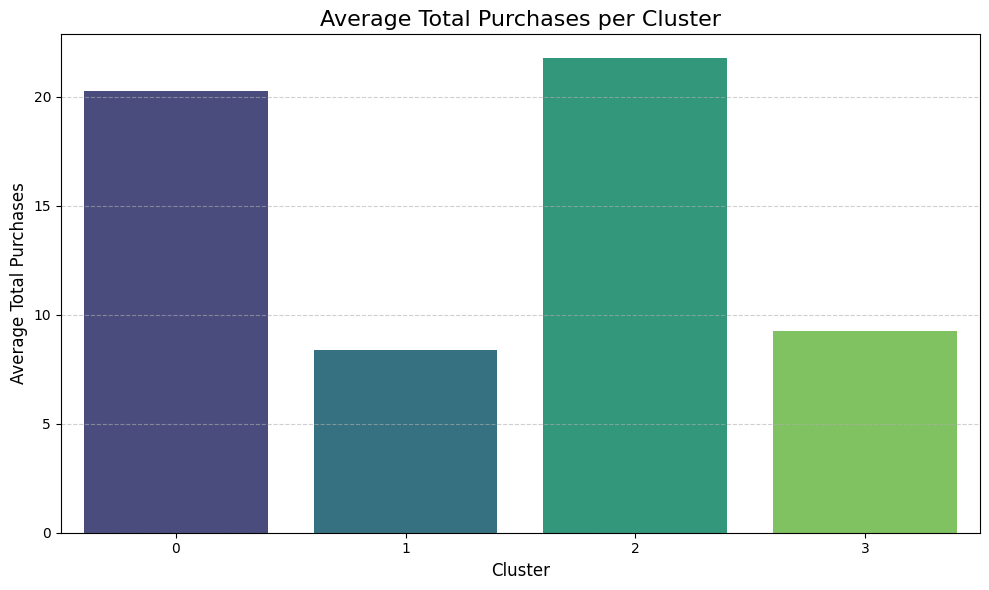

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_profiles.index, y='TotalPurchases', data=cluster_profiles, palette='viridis')
plt.title('Average Total Purchases per Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Total Purchases', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

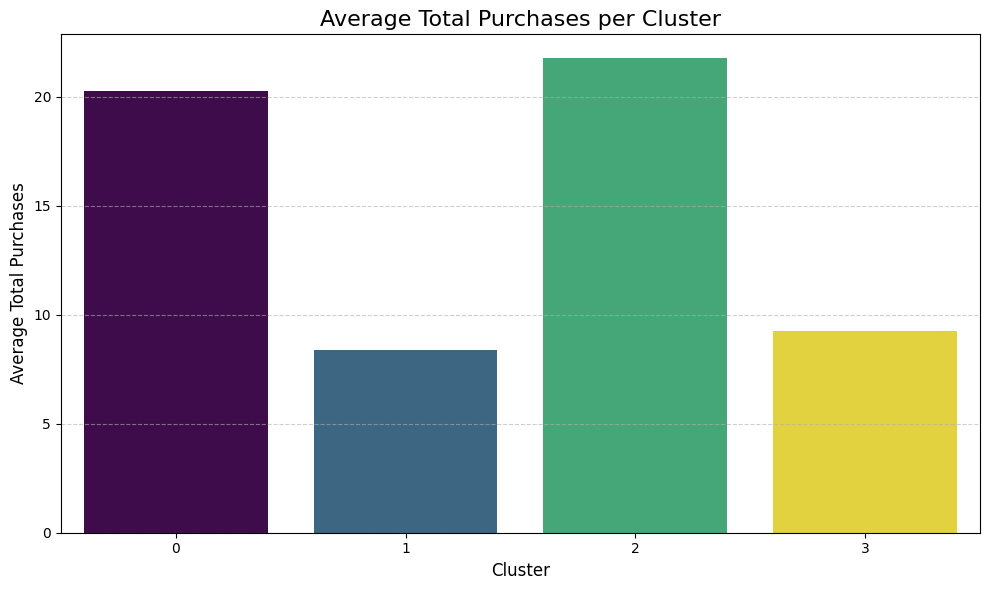

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_profiles.index, y='TotalPurchases', data=cluster_profiles, hue=cluster_profiles.index, palette='viridis', legend=False)
plt.title('Average Total Purchases per Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Total Purchases', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()